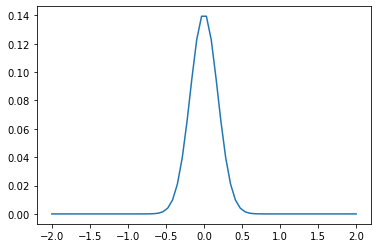

In [93]:
import matplotlib.pyplot as plt
import math
import numpy as np
from qiskit.circuit.library import NormalDistribution
from math import pi
from qiskit import IBMQ, BasicAer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.visualization import plot_histogram

#Preparing the Gaussian-shaped histogram that will be used in the initialisation

x = np.linspace(-2,2, num=64)
storage_for_normalisation = []

Normalisation_wavefunction = (1/(np.sqrt(2*np.pi)*2*0.4)*np.exp(-(0.5*x**2)/(2*0.016)))

Normalisation_Constant = np.sum(Normalisation_wavefunction)

waveFunction = (Normalisation_wavefunction)/(Normalisation_Constant)


plt.plot(x,waveFunction)
plt.show()


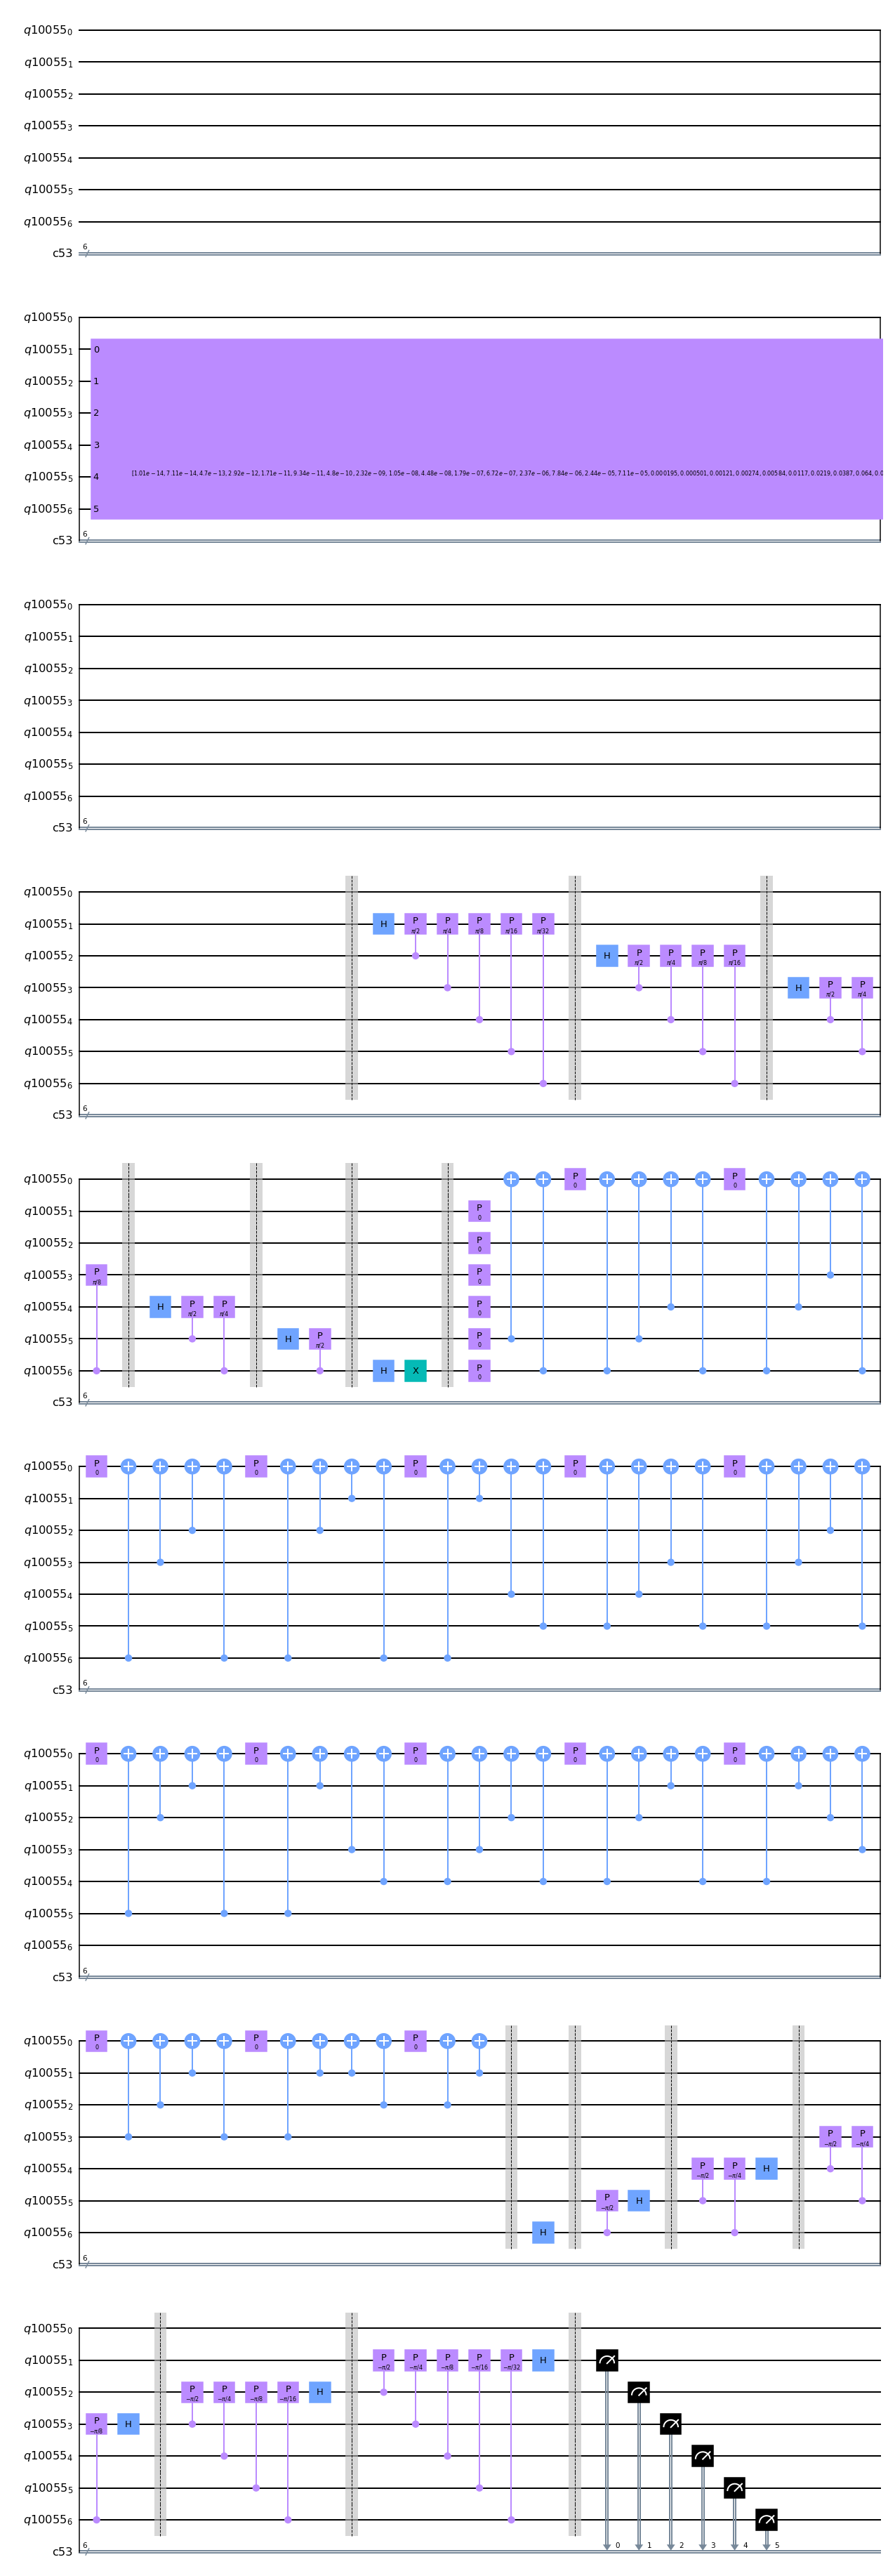

In [139]:


#n = 6 #number of qubits not including ancilla
phi = 0

qb = 6

q = QuantumRegister(qb + 1)
c = ClassicalRegister(6)
qc = QuantumCircuit(q,c)

qc2 = QuantumCircuit(q,c)

#Initialisation


#################################################################################################################


qc.initialize(np.sqrt(waveFunction), [q[1],q[2],q[3],q[4],q[5],q[6]])



#######################################################################################################################




#QFT




def QFT(qubits):
    for i in range(qubits):
        qc.barrier()
        qc.h(i+1)
        for j in range(qubits - 1 - i):
            qc.cp(pi/(2**(j+1)), i+2+j, i+1)
            
QFT(qb)

qc.x(qb)


qc.barrier()



#Time Step

def Time_Evolution(qubits):
    for i in range (qubits):
        qc.p(phi/(2**(i+qubits-3)), qubits-i)
    for i in range (qubits):
        for j in range (i+1,qubits):
            qc.cx(qubits-j, 0)
            qc.cx(qubits-i, 0)
            qc.p(phi* (2**(2-i-j)), 0) #2-i-j or 4?
            qc.cx(qubits-i, 0)
            qc.cx(qubits-j, 0)

Time_Evolution(qb)

qc.barrier()




#Inverse QFT

#qc.x(qb)


def QFT_Inv(qubits):
    for i in reversed(range(qubits)):
        for j in range(qubits - 1 - i):
            qc.cp(-pi/(2**(j+1)), i+2+j, i+1)
        qc.h(i+1)
        qc.barrier()
        
QFT_Inv(qb)






#Measurement

for k in range(6):
    qc.measure(k+1,k)
    qc2.measure(k+1,k)




qc.draw('mpl')


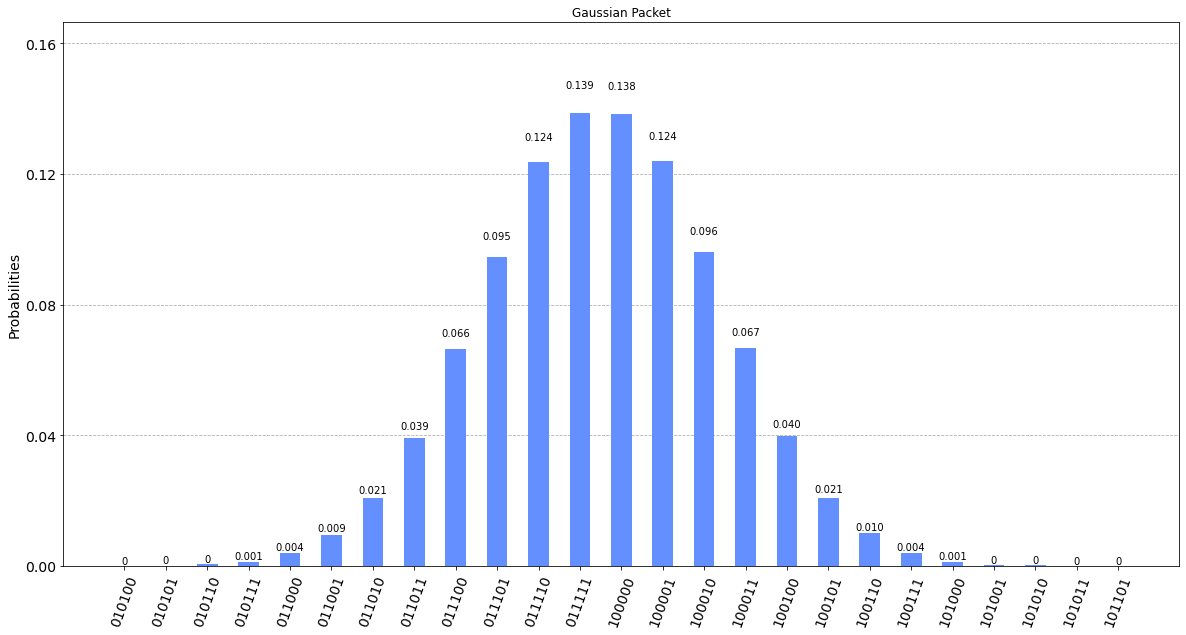

In [140]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 65536
results = execute(qc, backend=backend, shots=shots).result()


answer = results.get_counts()


plot_histogram(answer, title = "Gaussian Packet", figsize = [20,10])

